In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [2]:
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/opt/xray/'

In [11]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = 0.087
dna_drude.electron_density = 0.2921
dna_drude.refractive_index = 1.48
dna_drude.Z = 4.85

<IPython.core.display.Javascript object>


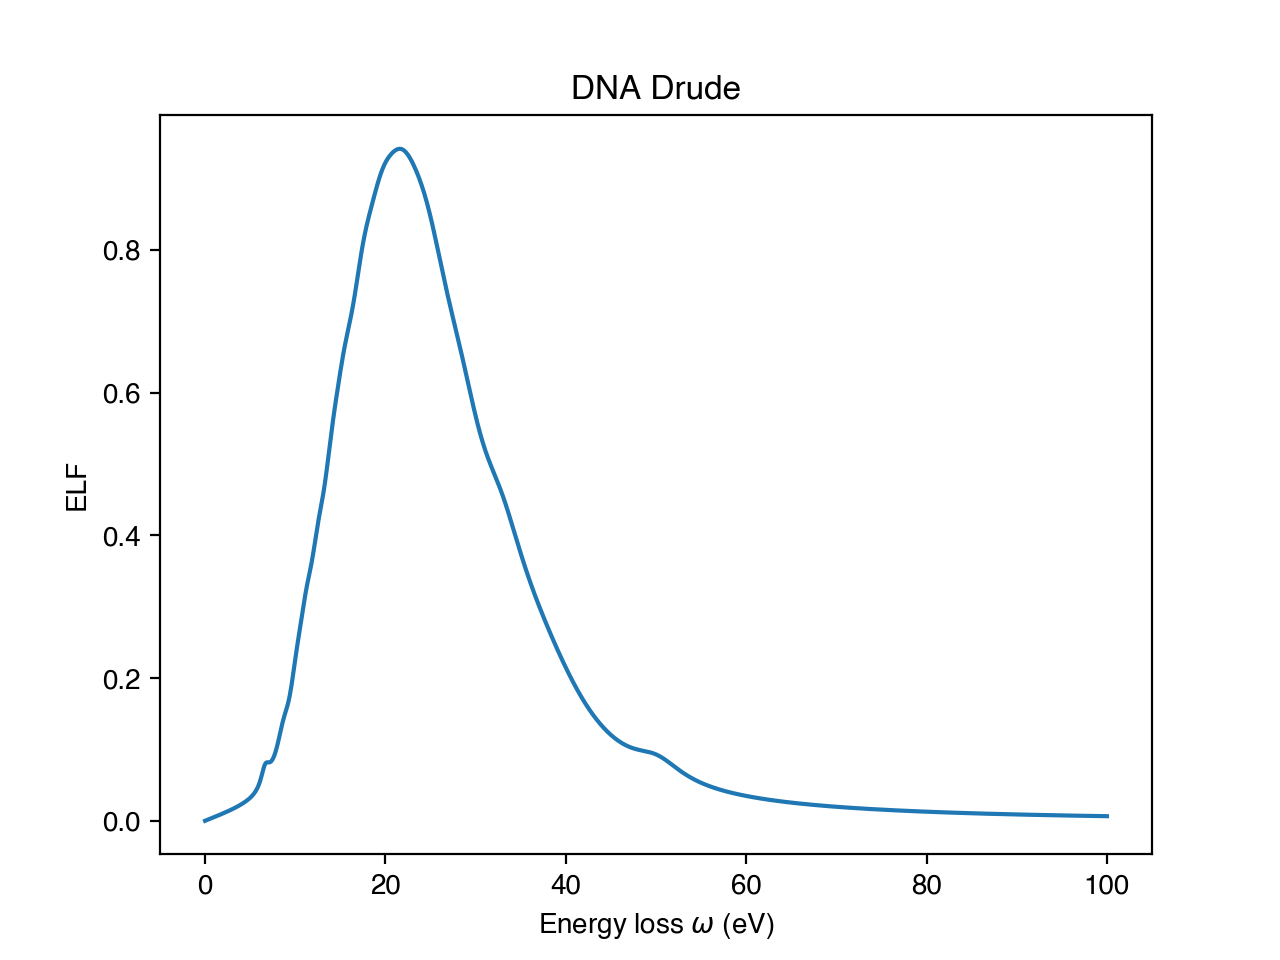

In [12]:
dna_drude.plotELF()

In [12]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [13]:
opt_ = opt.OptFit(dna_drude, x_exp, y_exp, 1600)

In [ ]:
result = opt_.runOptimisation()

In [8]:
oscOptimised = opt_.vec2Struct(result)

In [9]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [ 2.90268214 29.28636071 24.94867483  4.38467238 25.94599093 17.72983997
 29.04502144 20.81656149 24.05360049 21.69192151 20.3569652  24.68960707
 29.5963418  16.84365714 63.35654831 12.31595684 28.87977125  5.93530638]
Gamma: [ 1.13515685  1.93580794  1.8026426   1.70720423  2.48493249  2.19287422
  2.94499031  3.5519534   3.93289763  5.06026223  6.24936341 15.49724351
  8.34109867  8.15100727 69.74232802  6.9103854  13.958364    6.75839299]
Omega: [ 6.63026834  8.64990477  9.93643758 10.01240558 11.09023733 12.04208026
 13.45329957 15.0181391  16.72553989 18.89818564 21.09736838 22.57070055
 24.29067473 28.40864077 31.10844496 32.61286926 36.77457643 49.44384257]


<IPython.core.display.Javascript object>


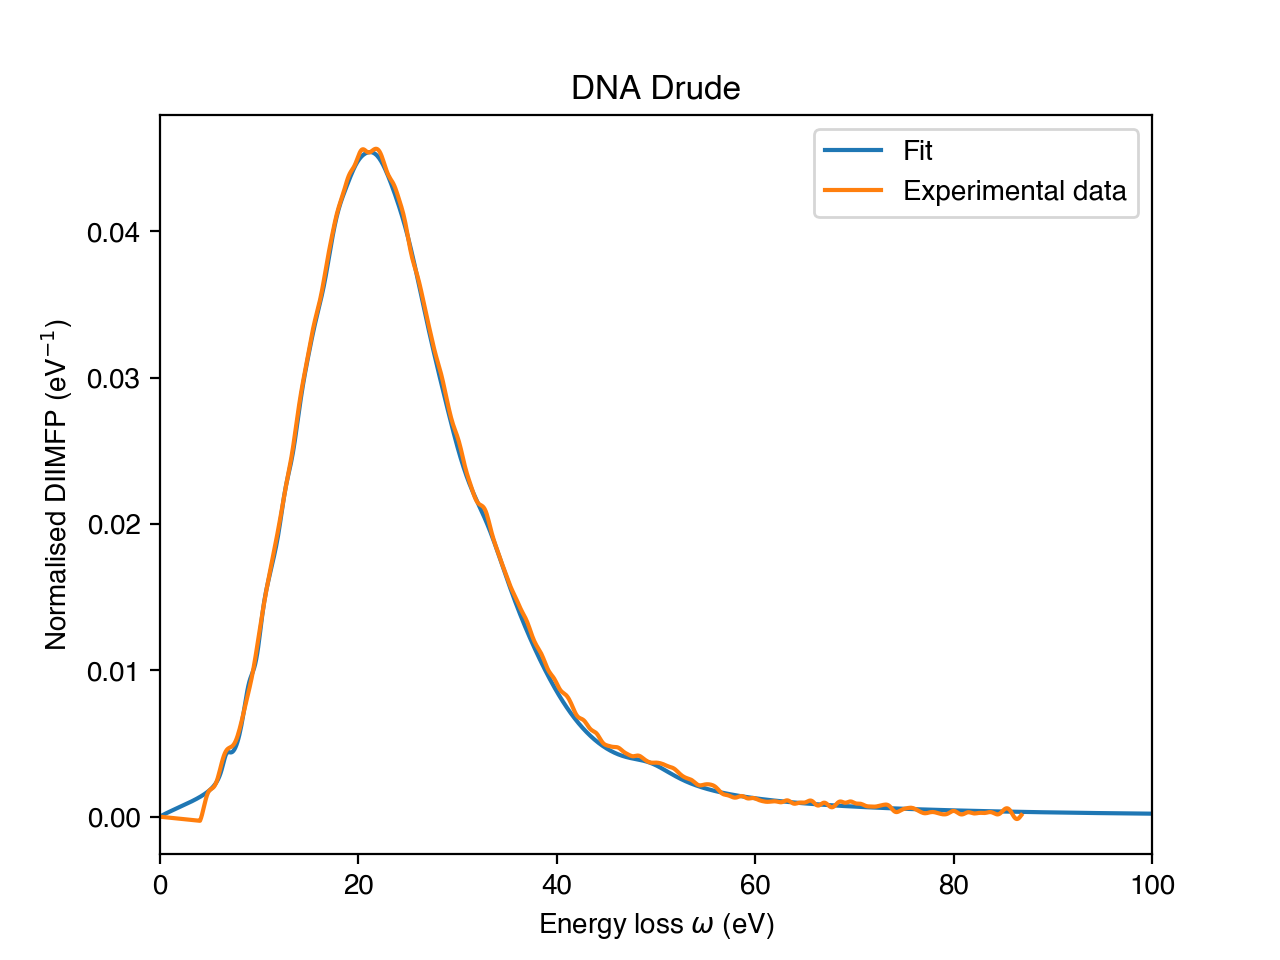

In [10]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [12]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.741086425872837
Z = 4.85
KKSum = 1.0950018906707149


<IPython.core.display.Javascript object>


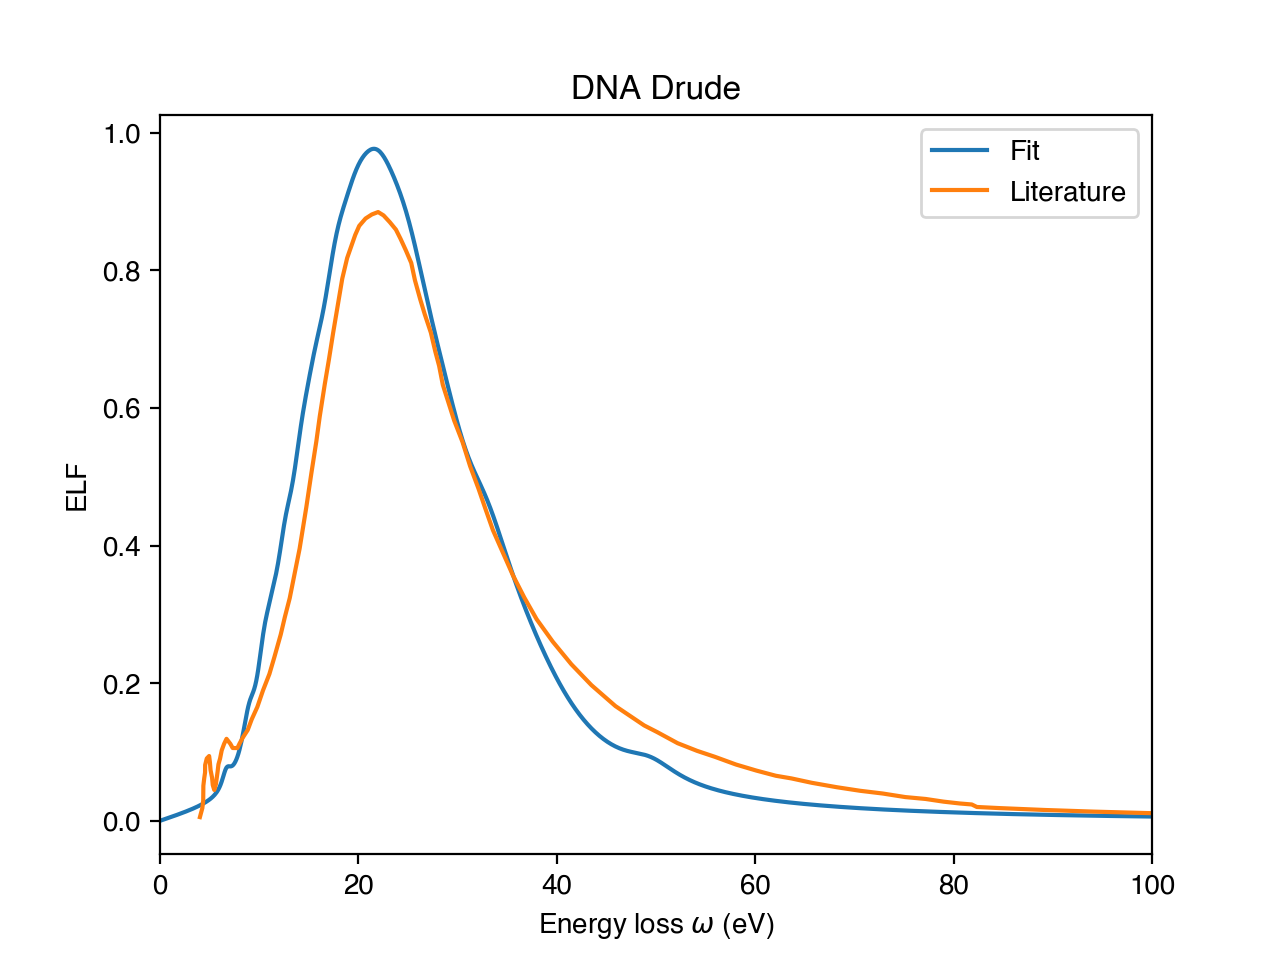

In [13]:
fd = pd.read_csv('../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values
oscOptimised.calculateELF()

plt.figure()
plt.plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
plt.plot(exp_elf[:,0],exp_elf[:,3],label='Literature')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

In [16]:
np.array([[0,2],[6,5]]).size

4

In [3]:
A =     [210,  50.0]
gamma = [0.53, 25.2]
omega = [3.04, 14.0]

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.4)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,30,0.1)
q = 0

M = 26.9815386 # Molar weight
rho = 2.6989 # g/cm3
N_Avogadro = 6.02217e23 

al_dl = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_dl.Ef = 11.2
al_dl.atomic_density = rho * N_Avogadro / M *1e-24
al_dl.static_refractive_index = 1.15
al_dl.electron_density = 0.2249
al_dl.omega_pl = np.sqrt(4*math.pi*al_dl.electron_density*opt.a0**3) * opt.h2ev
al_dl.Z = 13

In [4]:
fsum = al_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(al_dl.Z))

kksum = al_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 14.212951475192847
Z = 13
KKSum = 1.7906861342023954


In [5]:
fd = pd.read_csv('al.olga',sep=' ')
exp_diimfp = fd.values
x_exp = exp_diimfp[:,1]
y_exp = exp_diimfp[:,3]

<IPython.core.display.Javascript object>


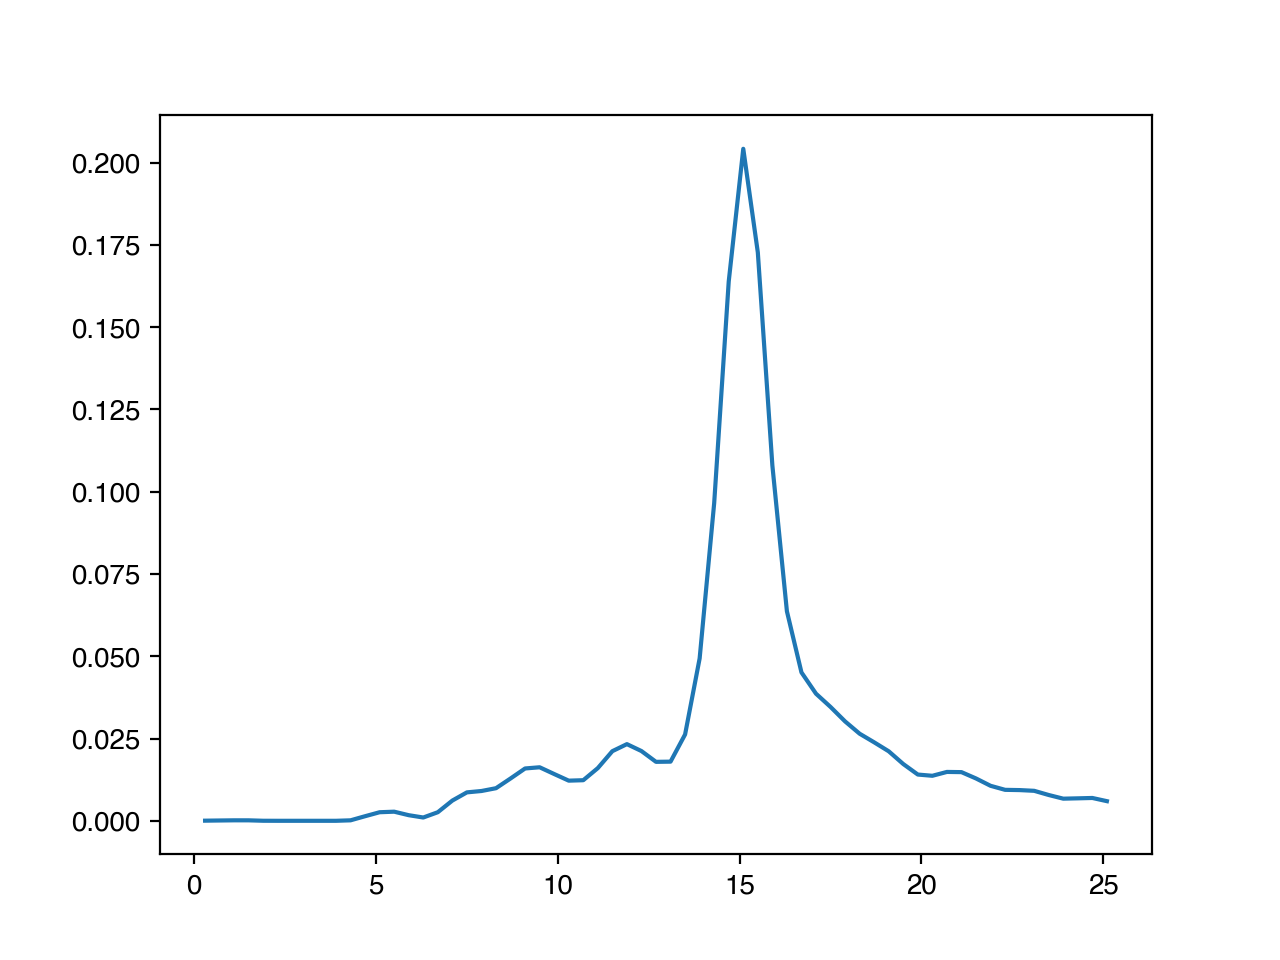

In [6]:
plt.figure()
plt.plot(x_exp, y_exp)
plt.show()

In [7]:
opt_ = opt.OptFit(al_dl, x_exp, y_exp, 700)

In [8]:
result = opt_.runOptimisation()

In [9]:
oscOptimised = opt_.vec2Struct(result)

In [10]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [220.07506276  90.03691096]
Gamma: [ 0.5304851 32.7122597]
Omega: [ 3.00571067 18.43102409]


<IPython.core.display.Javascript object>


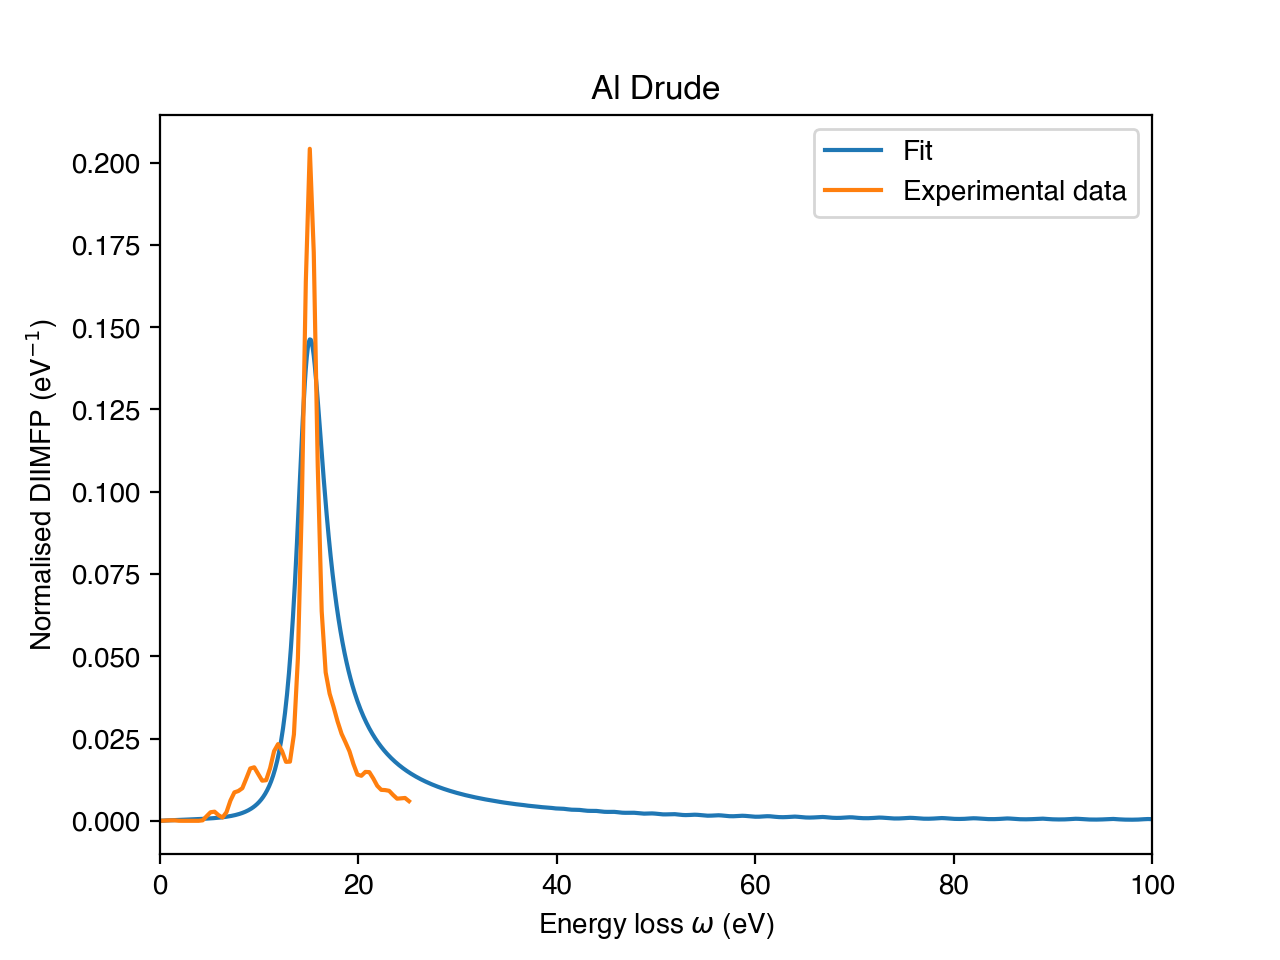

In [11]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()